## Rolling and Expanding
The DataFrame.rolling function in pandas is used to create a rolling window object for performing rolling computations on time series or other ordered data. It allows you to apply a function or calculation to a specified window of data, which moves along the data axis.

Some common use cases for DataFrame.rolling include:

* Moving averages: One common application is calculating moving averages, such as the simple moving average or exponential moving average, where you calculate the average of values within a specified window as it slides along the data.

* Rolling statistics: You can compute various statistics on a rolling window, such as the rolling mean, rolling sum, rolling standard deviation, or rolling correlation coefficient. These statistics provide insights into trends, variability, and relationships within the data.

* Smoothing: Rolling computations can help smooth out noise or fluctuations in time series data by averaging or aggregating values over a window. This can be useful for identifying underlying patterns or trends.

* Feature engineering: Rolling computations can also be used in feature engineering for machine learning tasks. For example, you might calculate the rolling maximum, minimum, or percentile values as features for predicting future values or detecting anomalies.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Data/starbucks.csv', index_col='Date', parse_dates=True)
df.sort_index(axis=0, inplace=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [3]:
df.describe()

,Close,Volume
count,1006.000000,1.006000e+03
mean,54.070133,9.617402e+06
std,4.849600,4.986199e+06
min,36.974800,2.215418e+06
25%,52.170075,6.828217e+06
50%,54.631600,8.338076e+06
75%,56.603475,1.091071e+07
max,68.353000,6.209107e+07


### resample the frequency

In [4]:
# daily ----> Yearly
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [5]:
def first_day(entry):
    # print(entry['Volume'])
    if len(entry):
        return entry[0]

In [6]:
df.resample(rule='A').apply(first_day) # type: ignore

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


<Axes: xlabel='Date'>

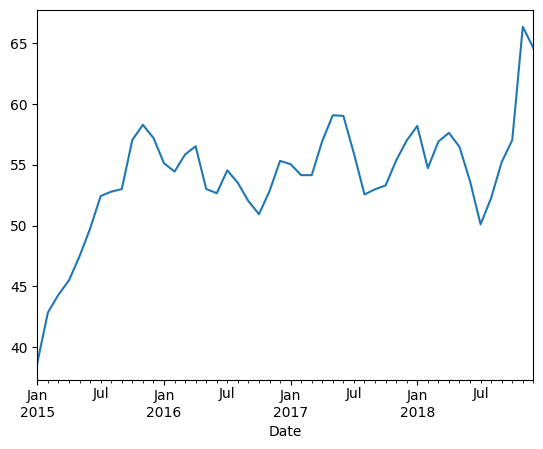

In [9]:
df['Close'].resample(rule='m').mean().plot.line()

<Axes: xlabel='Date'>

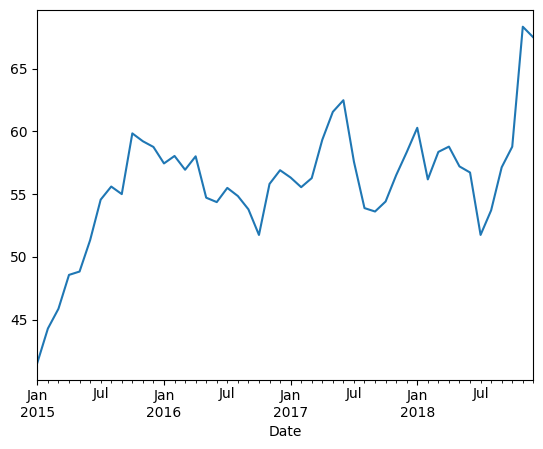

In [86]:
df['Close'].resample(rule='m').max().plot.line()

### Rolling and Expanding

<Axes: xlabel='Date'>

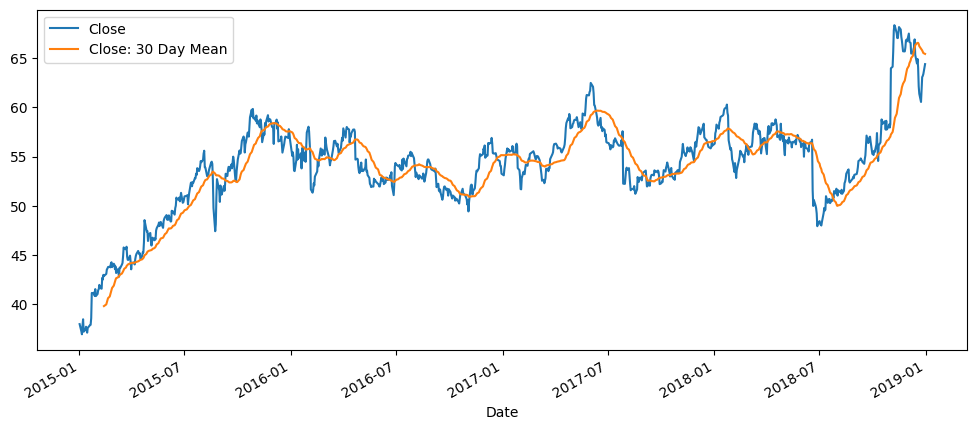

In [94]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close', 'Close: 30 Day Mean']].plot.line(figsize=(12,5))

### Expanding
* apply an aggregation function on every row before the current row

<Axes: xlabel='Date'>

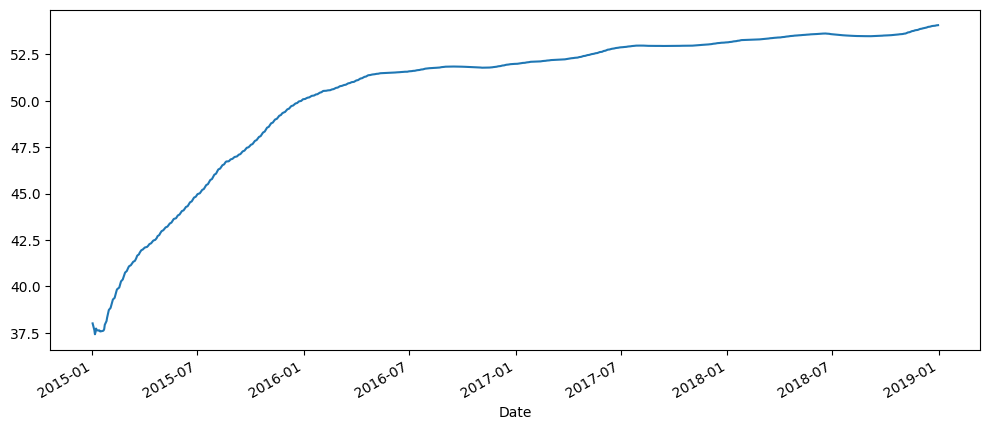

In [96]:
df['Close'].expanding(min_periods=1).mean().plot.line(figsize=(12,5))

Text(0, 0.5, 'Volume')

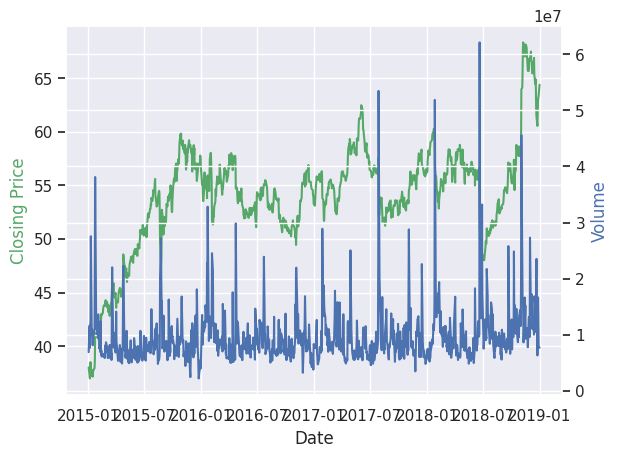

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['Close'], 'g-')
ax2.plot(df['Volume'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='g')
ax2.set_ylabel('Volume', color='b')